In [1]:
import yfinance
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


<AxesSubplot:xlabel='Date'>

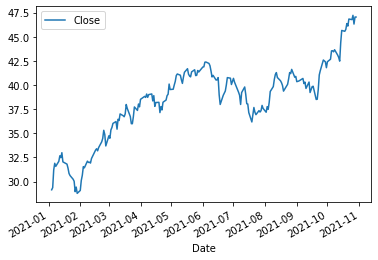

In [2]:
def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt(np.mean(diffs**2))

bac_ticker = yfinance.Ticker('BAC')
bac_frame = bac_ticker.history(period='id', start='2021-01-01', end='2021-10-30')['Close'].to_frame()
bac_frame.plot()

In [10]:
series = bac_frame['Close']

In [4]:
ar_deg = 4
model = sm.tsa.AutoReg(series.reset_index()['Close'], ar_deg, trend='n').fit()
print(model.params)

Close.L1    1.030344
Close.L2    0.008232
Close.L3   -0.103911
Close.L4    0.067176
dtype: float64


In [15]:
# coeffs in reverse order to have to reverse them back to what used to
coeffs = list(reversed(model.params))
num_coeffs = len(coeffs)


print(coeffs, num_coeffs)

[0.06717557498586649, -0.10391121488293528, 0.00823187080207355, 1.0303438734916495] 4


In [6]:
# compute root mean square error as estimate of std

std_dev = rmse(model.predict(), series.reset_index()['Close'])
print(std_dev)

0.5955919733851943


In [7]:
# follow a number of trajectories, start with 5 and add more later
# number of trajectories
num_samples = 5

In [11]:
# initial values of the each trajectory
# each trajectory = a different row
initial_values = np.array(series[-10:]).reshape(1,-1)
initial_values

array([[45.57172775, 45.76866913, 46.36933517, 46.11331177, 46.84198761,
        46.78290558, 47.226017  , 46.32010269, 47.04877472, 47.04877472]])

In [9]:
# need to make a 2-d array thas has num_sample copies of this row using numpy `broadcast_to`
values = np.broadcast_to(initial_values, (num_samples, 10))

In [18]:
trajectory_length = 50

for i in range(trajectory_length):
    next_prediction = coeffs @ values[-num_coeffs:,:]
    next_row = next_prediction + std_dev * np.random.randn(num_samples)
    values = np.append(values, next_row.reshape(1, num_samples), axis=0)
_=plt.plot(values)

ValueError: operands could not be broadcast together with shapes (10,) (5,) 